In [1]:
#|default_exp app

# Bear Classifier App

This notebook creates uses an exported model `export.pkl` for a bear classifier, to create a python script which can run the model on HuggingFace. 

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

Let's take a look at an example picture:

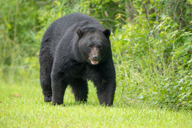

In [3]:
#im = PILImage.create('teddybear.jpg')
#im = PILImage.create('grizzly.jpg')
im = PILImage.create('blackbear.jpg')

im.thumbnail((192, 192))
im

Let's import the model and create the learner:

In [4]:
#|export
learn = load_learner('export.pkl')

With the learner we can to the predictions (inference):

In [5]:
learn.predict(im)

('black', TensorBase(0), TensorBase([9.9979e-01, 1.9130e-04, 1.6887e-05]))

The available categories are contained in the vocab:

In [6]:
learn.dls.vocab

['black', 'grizzly', 'teddy']

This is the function to classify the images:

In [7]:
#|export
def classify_image(img):
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(learn.dls.vocab, map(float, probs)))

Testing the function:

In [8]:
classify_image(im)

{'black': 0.9997918009757996,
 'grizzly': 0.0001913038140628487,
 'teddy': 1.688681004452519e-05}

## Gradio App

Now it is time to create the gradio app:

In [1]:
# commented, because it produced warnings

#image = gr.inputs.Image(shape=(192,192))
#label = gr.outputs.Label()

In [10]:
#|export
image = gr.components.Image(shape=(192,192))
label = gr.components.Label()
examples = ['teddybear.jpg', 'grizzly.jpg', 'blackbear.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7fa82b2d9480>, 'http://127.0.0.1:7860/', None)

In [10]:
intf.close()

Closing server running on port: 7860


## Export

Finally, we export the code in the cells which are marked with `#|export`:

In [12]:
# commented, because it does not work

# import notebook2script from nbdev.export
# notebook2script('app.ipynb')

In [13]:
from nbdev import nbdev_export

In [13]:
nbdev_export('app.ipynb')
print('Export successful')

Export successful
